In [4]:
import pandas as pd
from lexicon import Lexicon

# Load the dataset
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/tr_fin.csv')

# Create a new column to store the sentiment labels
df['sentiment'] = None

# Initialize the Lexicon class
lexicon = Lexicon()

# Iterate through the rows of the dataset
for index, row in df.iterrows():
    text = df['text']
    # Classify the sentiment of the text using the lexicon package
    sentiment = lexicon.classify(text)
    # Store the sentiment label in the dataset
    df.at[index, 'sentiment'] = sentiment

# Print the resulting dataset
print(df)

KeyError: 'text'

In [9]:
import pandas as pd
from lexicon import Lexicon

# Load the dataset
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/tr_fin2.csv')

# Create a new column to store the sentiment labels
df['sentiment'] = None

# Initialize the Lexicon class
lexicon = Lexicon()

# Iterate through the rows of the dataset
for index, row in df.iterrows():
    text = row['text']
    # Classify the sentiment of the text using the lexicon package
    sentiment = lexicon.classify(text)
    # Store the sentiment label in the dataset
    df.at[index, 'sentiment'] = sentiment

# Print the resulting dataset
print(df)

AttributeError: classify

In [10]:
from transformers import AutoModelForSequenceClassification, DistilGPT2Tokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilgpt2")
tokenizer = DistilGPT2Tokenizer.from_pretrained("distilgpt2")

import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/tr_fin2.csv')

# Define a function to tokenize the "text" column
def tokenize_text(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')
    return input_ids

# Apply the tokenize_text function to the "text" column
df["input_ids"] = df["text"].apply(tokenize_text)

# Define a function to predict sentiment
def predict_sentiment(input_ids):
    outputs = model(input_ids)
    sentiment_logits = outputs[0]
    sentiment_class = sentiment_logits.argmax()
    return sentiment_class

# Apply the predict_sentiment function to the "input_ids" column
df["sentiment"] = df["input_ids"].apply(predict_sentiment)

ImportError: cannot import name 'DistilGPT2Tokenizer' from 'transformers' (/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/transformers/__init__.py)

In [11]:
import pandas as pd

# Read in the first CSV file
df1 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/mx_wob2.csv")

# Read in the first CSV file
df2 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/pl_wob2.csv")

# Read in the first CSV file
df3 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/tr_wob2.csv")

# Read in the first CSV file
df4 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/sa_wob2.csv")

# Concatenate the two DataFrames along the rows (axis=0)
merged_df = pd.concat([df1, df2, df3, df4], axis=0)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("merged-indonesia.csv", index=False)


In [23]:

# Load the dataset
df = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/sa_fin4.csv")
df = df.iloc[:, :2]

# Group the texts by date and concatenate them into a single string
df = df.groupby('versionCreated')['text'].apply(lambda x: ', '.join(x)).reset_index()

# Rename the columns
df.columns = ['date', 'text']
df.insert(1, 'country', 'sa', True)


# Print the resulting dataset
df.to_csv("/Users/mertcakir/Desktop/tez python/texts/sa_wob1.csv", index=False)

In [33]:
import pandas as pd

# Load the first dataset
df1 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/sa_wob1.csv")

# Load the second dataset
df2 = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/sa_fin7.csv")

# Perform a "vlookup" operation between the two datasets
# by merging them on the 'id' column
df = pd.merge(df1, df2, on='date')
df = df.drop(df.columns[[3, 4, 5, 6]], axis=1)

# Print the resulting dataset
df.to_csv("/Users/mertcakir/Desktop/tez python/texts/sa_wob2.csv", index=False)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
#df = pd.read_csv('news_data.csv')

# Split the dataset into training and test sets
train_data = pd.read_csv("/Users/mertcakir/Downloads/merged-turkey.csv")
test_data = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/tr_wob2.csv")


# Convert the text to a bag of words representation
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data['text'])
test_vectors = vectorizer.transform(test_data['text'])

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_vectors, train_data['label'])

# Make predictions on the test set
predictions = clf.predict(test_vectors)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_data['label'], predictions)
print("Accuracy: ", accuracy)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
import pandas as pd
from textblob import TextBlob

# Load the data into a DataFrame
df = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/pl_wob1.csv")

# Add two new columns for the polarity and subjectivity scores
df["polarity"] = None
df["subjectivity"] = None

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    text = row["text"] # assuming your text column name is 'text_column'
    blob = TextBlob(text)
    sentiment = blob.sentiment
    df.at[i, "polarity"] = sentiment.polarity
    df.at[i, "subjectivity"] = sentiment.subjectivity

# Output the updated DataFrame to a CSV file
df.to_csv("/Users/mertcakir/Desktop/tez python/texts/pl_tb.csv", index=False)


In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer class
sia = SentimentIntensityAnalyzer()

# Classify the sentiment of text
text = ""
sentiment = sia.polarity_scores(text)
print(sentiment)

{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.4215}


In [33]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


# Load the data into a DataFrame
df = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/sa_fin5.csv")

# Add two new columns for the polarity and subjectivity scores
df["polarity"] = None
df["subjectivity"] = None
df['vader'] = None

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    text = row["text"] # assuming your text column name is 'text_column'
    blob = TextBlob(text)
    sentiment = blob.sentiment
    df.at[i, "polarity"] = sentiment.polarity
    df.at[i, "subjectivity"] = sentiment.subjectivity
    
# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    text = row["text"] # assuming your text column name is 'text_column'
    sentiment = sia.polarity_scores(text)['compound']
    df.at[i, 'vader'] = sentiment
    


# Output the updated DataFrame to a CSV file
df.to_csv("/Users/mertcakir/Desktop/tez python/texts/sa_ns.csv", index=False)

In [20]:
# Read in the dataset
#df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/ind_ns.csv')
df = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/mx_fin66.csv')
# Drop the second column
#df = df.drop(columns=['text'])

# Group the rows by the first column and average the values in the other columns
#df = df.groupby('versionCreated').mean().reset_index()

# Round the averages to 2 decimal places
df = df.round(2)

# Save the modified DataFrame to a CSV file
df.to_csv('/Users/mertcakir/Desktop/tez python/texts/mx_last.csv', index=False)

In [21]:
import pandas as pd

# Read in the first CSV file
df1 = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/mx_last2.csv')

# Read in the second CSV file
df2 = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/tr_last2.csv')

# Read in the second CSV file
df3 = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/pl_last2.csv')

# Read in the second CSV file
df4 = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/sa_last2.csv')

# Read in the second CSV file
df5 = pd.read_csv('/Users/mertcakir/Desktop/tez python/texts/ind_last2.csv')

# Concatenate the two DataFrames along the rows (axis=0)
merged_df = pd.concat([df1, df2, df3, df4, df5], axis=0)
merged_df = merged_df.round(3)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv", index=False)

#"label","date","TB_polarity","TB_subjectivity","V_compound","T_range","FK_grade","FB_score"

In [30]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/merged_file.csv")

# Split dataset into features (X) and label (y)
X = data.drop(["Label","Date"], axis=1)
y = data["Label"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an SVM classifier
clf = SVC(kernel='rbf', probability=True)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the classifier
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", roc_auc)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)


AUC-ROC: 0.6019435055528729
Accuracy: 0.578544061302682
AUC-PR: 0.6439827612676827


/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/merged_file_v3.csv")


# Split dataset into features (X) and label (y)
X = data.drop(["Label","T_range","FK_grade","Date"], axis=1)
y = data["Label"]

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create and train MLP model
clf = MLPClassifier(hidden_layer_sizes=(10,14,2), max_iter=10000)
clf.fit(x_train, y_train)

# make predictions on test data
y_pred = clf.predict(x_test)

# calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC: ", roc_auc)

# calculate AUC-PR
pr_auc = average_precision_score(y_test, y_pred)
print("AUC-PR: ", pr_auc)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

AUC-ROC:  0.5475219773219518
AUC-PR:  0.6625711197136298
Accuracy:  0.6590038314176245


/opt/miniconda3/envs/finbert/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


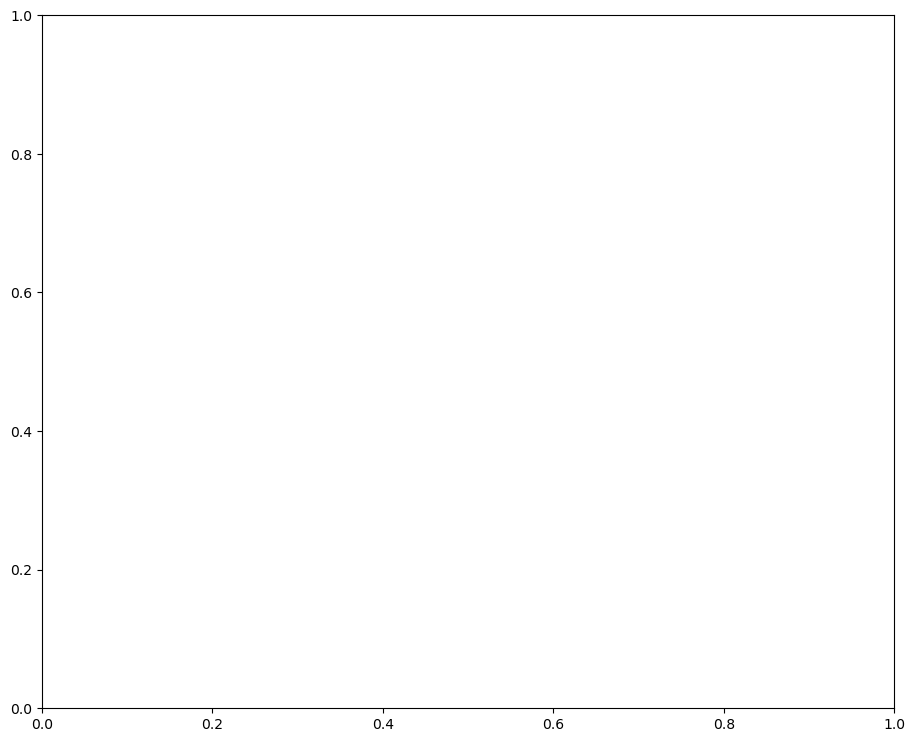

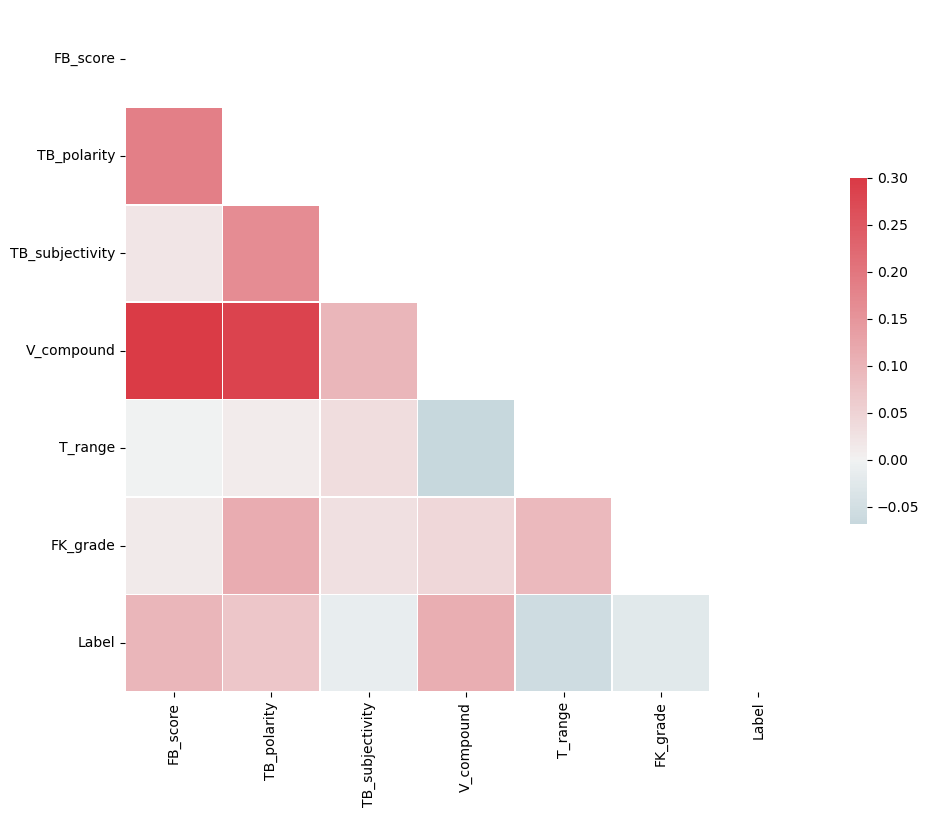

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
data = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/merged_file.csv")

# Exclude the first and second columns
data = data.iloc[:, 2:]

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add labels to the columns and rows
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

# Show the plot
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv")

# Exclude the first and second columns
data = data.iloc[:, 2:]

# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the correlation matrix heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

# Add labels to the columns and rows
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

# Show the plot
#plt.show()
#plt.savefig("/Users/mertcakir/Desktop/tez python/texts/correlation_matrixv5.png", dpi=300, bbox_inches='tight')


[Text(0, 0.5, 'FB_class'),
 Text(0, 1.5, 'FB_score'),
 Text(0, 2.5, 'TB_polarity'),
 Text(0, 3.5, 'TB_subjectivity'),
 Text(0, 4.5, 'V_compound'),
 Text(0, 5.5, 'T_range'),
 Text(0, 6.5, 'FK_grade'),
 Text(0, 7.5, 'Label')]

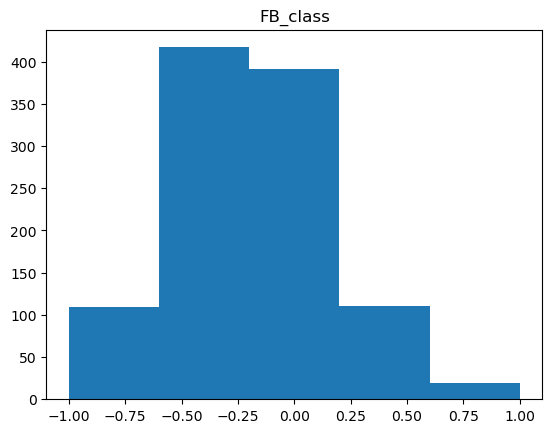

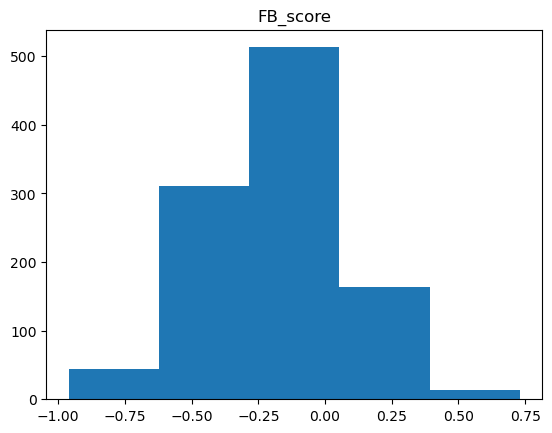

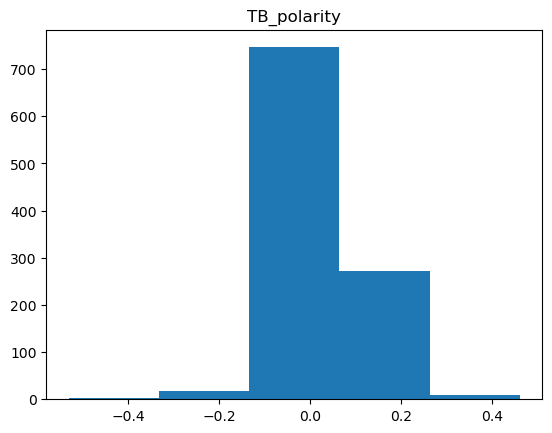

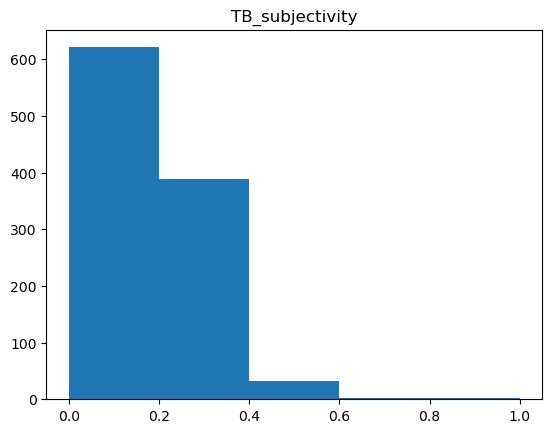

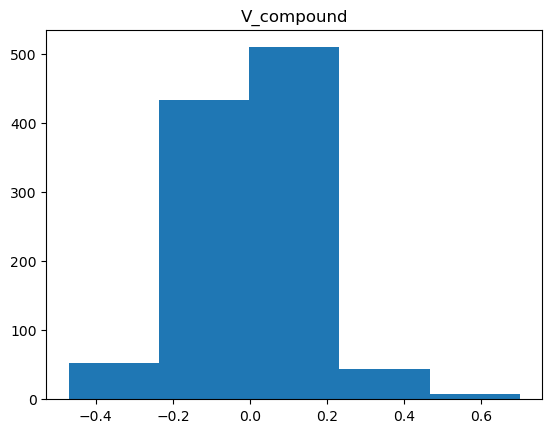

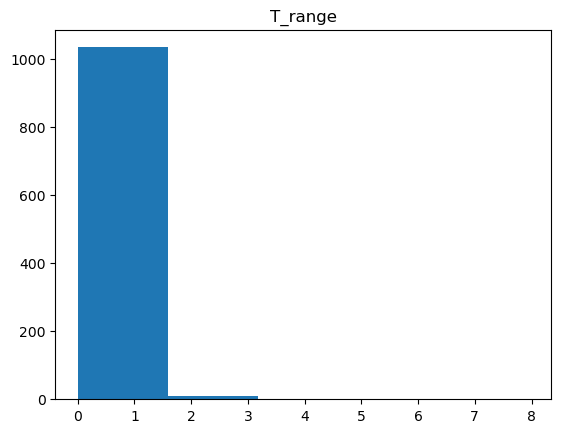

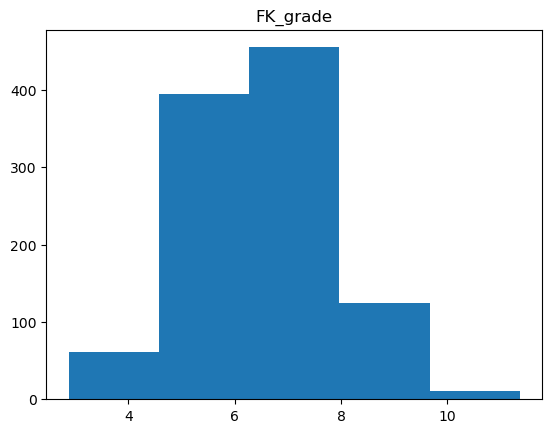

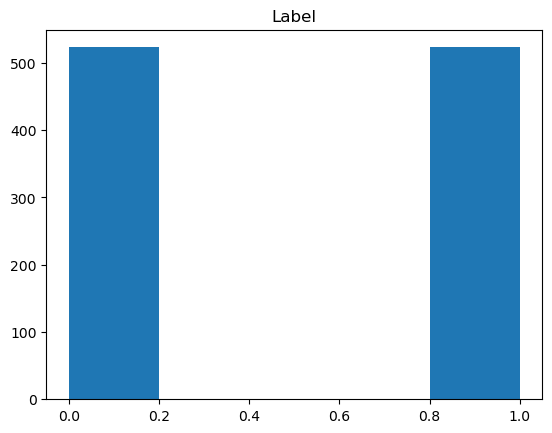

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Select only numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a histogram for each numerical column
for col in numerical_columns:
    # Adjust bar range for each variable
    min_value = data[col].min()
    max_value = data[col].max()
    bins = np.linspace(min_value, max_value, 6)
    # Create histogram
    plt.hist(data[col], bins=bins)
    plt.title(col)
    plt.savefig("/Users/mertcakir/Desktop/tez python/texts/{}_histogram.png".format(col), dpi=300, bbox_inches='tight')   
    plt.show()


In [2]:
import pandas as pd
# Read the dataset into a DataFrame
df = pd.read_csv("/Users/mertcakir/Desktop/tez python/texts/merged_filev4.csv")

# Get summary statistics for the numeric columns
summary_stats = df.describe()

# Print the summary statistics to the console
#print(summary_stats)

# select top 4 variables from summary stats
top_4 = summary_stats.iloc[:,:4]
# select bottom 4 variables from summary stats
bottom_4 = summary_stats.iloc[:,4:]
# create table
table = pd.concat([top_4], axis = 1)
print(table)
table = pd.concat([bottom_4], axis = 1)
print(table)

          FB_class     FB_score  TB_polarity  TB_subjectivity
count  1046.000000  1046.000000  1046.000000      1046.000000
mean     -0.183231    -0.179541     0.031969         0.183910
std       0.361216     0.260102     0.074904         0.107357
min      -1.000000    -0.960000    -0.530000         0.000000
25%      -0.430000    -0.350000     0.000000         0.110000
50%      -0.200000    -0.175000     0.030000         0.180000
75%       0.000000    -0.010000     0.070000         0.240000
max       1.000000     0.730000     0.460000         1.000000
        V_compound      T_range     FK_grade        Label
count  1046.000000  1046.000000  1046.000000  1046.000000
mean      0.000258     0.191737     6.499904     0.500000
std       0.146181     0.416309     1.286890     0.500239
min      -0.470000     0.000000     2.880000     0.000000
25%      -0.090000     0.043500     5.600000     0.000000
50%       0.000000     0.090000     6.510000     0.500000
75%       0.090000     0.200000     